# 데이터 EDA

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf


train_file_path = "Data/origin_train.csv"
test_file_path = "Data/origin_test.json"
submission_file_path = 'Data/submission.csv'
train_data = pd.read_csv(train_file_path)
print("Train Data Sample:")
print(train_data.head())

print("\nTrain Data Columns:")
print(train_data.columns)

test_data = pd.read_json(test_file_path).T
test_data.head()

submission_data = pd.read_csv(submission_file_path)


print("\nTest Data Sample:")
print(test_data.head())
print(test_data.columns)

# submission.csv 파일 읽기
submission_data = pd.read_csv(submission_file_path)
print("\nSubmission Data Sample:")
print(submission_data.head())
print(submission_data.columns)

ModuleNotFoundError: No module named 'wordcloud'

In [4]:
# train 데이터 구조 및 통계 정보 확인
print("\nTrain Data Info:")
print(train_data.info())

# test 데이터 구조 및 통계 정보 확인
print("\nTest Data Info:")
print(test_data.info())

# submission 데이터 구조 및 통계 정보 확인
print("\nSubmission Data Info:")
print(submission_data.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idx           4906 non-null   int64 
 1   class         4906 non-null   object
 2   conversation  4906 non-null   object
dtypes: int64(1), object(2)
memory usage: 115.1+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, t_000 to t_499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
dtypes: object(1)
memory usage: 24.0+ KB
None

Submission Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   file_name  400 non-null    object 
 1   class      0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 6.

In [5]:
# 결측치 확인
print("\nTrain Data Missing Values:")
print(train_data.isnull().sum())

print("\nTest Data Missing Values:")
print(test_data.isnull().sum())

print("\nSubmission Data Missing Values:")
print(submission_data.isnull().sum())



Train Data Missing Values:
idx             0
class           0
conversation    0
dtype: int64

Test Data Missing Values:
text    0
dtype: int64

Submission Data Missing Values:
file_name      0
class        400
dtype: int64


In [6]:
# 결측치 확인
print("\nTrain Data Missing Values:")
print(train_data.isnull().sum())

print("\nTest Data Missing Values:")
print(test_data.isnull().sum())

print("\nSubmission Data Missing Values:")
print(submission_data.isnull().sum())



Train Data Missing Values:
idx             0
class           0
conversation    0
dtype: int64

Test Data Missing Values:
text    0
dtype: int64

Submission Data Missing Values:
file_name      0
class        400
dtype: int64


In [7]:
label_col = 'class' if 'class' in train_data.columns else train_data.columns[-1]  # Assuming label column is the last one if unnamed
print("\nTrain Data Label Distribution:")
print(train_data[label_col].value_counts())


Train Data Label Distribution:
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
일반 대화           956
협박 대화           896
Name: class, dtype: int64


In [8]:
# 텍스트 길이 분석
text_col = 'conversation' if 'conversation' in train_data.columns else train_data.columns[0]  # Assuming text column is the first one if unnamed

# 텍스트 데이터 타입 확인 및 정리
train_data['text_length'] = train_data[text_col].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
test_data['text_length'] = test_data['text'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

print("\nTrain Data Text Length Stats:")
print(train_data['text_length'].describe())

print("\nTest Data Text Length Stats:")
print(test_data['text_length'].describe())


Train Data Text Length Stats:
count    4906.000000
mean      258.097228
std       143.286725
min        41.000000
25%       162.000000
50%       218.000000
75%       306.000000
max       885.000000
Name: text_length, dtype: float64

Test Data Text Length Stats:
count    500.000000
mean     213.626000
std      101.240473
min       68.000000
25%      143.000000
50%      189.000000
75%      253.500000
max      722.000000
Name: text_length, dtype: float64


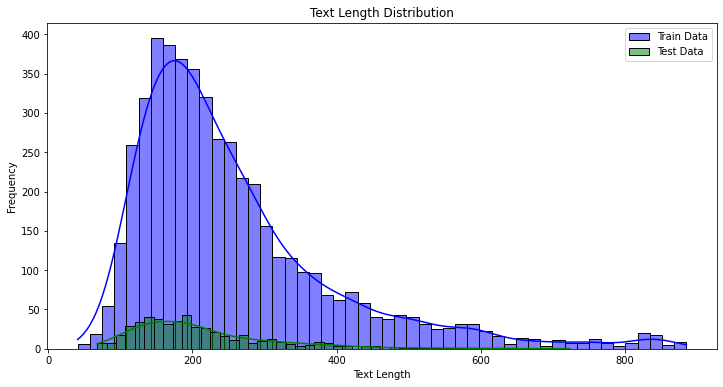

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 텍스트 길이 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(train_data['text_length'], bins=50, kde=True, color='blue', label='Train Data')
sns.histplot(test_data['text_length'], bins=50, kde=True, color='green', label='Test Data')
plt.legend()
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
!apt-get update      
!apt-get install fonts-nanum* #나눔글꼴 설치

In [ ]:
import matplotlib.font_manager as fm


fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

In [ ]:
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import pandas as pd

# 형태소 분석기 초기화
okt = Okt()

# 예시 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 텍스트 열 이름
text_col = 'conversation' if 'conversation' in train_data.columns else train_data.columns[0]

# 클래스별 단어 구름 시각화
for label in train_data['class'].unique():
    # 해당 클래스의 텍스트 추출
    text = " ".join(train_data[train_data['class'] == label][text_col].dropna().astype(str))
    
    # 형태소 분석을 통해 명사만 추출
    tokens = okt.nouns(text)
    
    # 명사 리스트를 문자열로 변환
    tokens_str = " ".join(tokens)
    
    # 단어 구름 생성
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(tokens_str)
    
    # 단어 구름 시각화
    plt.figure(figsize=(10, 5))
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label {label}')
    plt.axis('off')
    plt.show()



In [ ]:
# 클래스 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=train_data)
plt.title('Class Distribution in Train Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 텍스트 길이 계산
train_data['text_length'] = train_data['conversation'].apply(lambda x: len(x.split()))

# 클래스별 텍스트 길이 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='text_length', data=train_data)
plt.title('Text Length Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(train_data['conversation'])

# 클래스별 중요한 단어 시각화
classes = train_data['class'].unique()

for cls in classes:
    class_data = train_data[train_data['class'] == cls]['conversation']
    class_tfidf = vectorizer.transform(class_data)
    tfidf_means = np.mean(class_tfidf.toarray(), axis=0)
    tfidf_indices = np.argsort(tfidf_means)[::-1][:10]  # 상위 10개 단어 선택
    
    words = np.array(vectorizer.get_feature_names_out())[tfidf_indices]
    scores = tfidf_means[tfidf_indices]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=scores, y=words)
    plt.title(f'Top 10 TF-IDF Words for Class: {cls}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Word')
    plt.show()

In [ ]:
from collections import Counter
import seaborn as sns

# 형태소 분석기 초기화
okt = Okt()

# 모든 텍스트를 결합
all_text = " ".join(train_data['conversation'].dropna().astype(str))

# 형태소 분석을 통해 명사만 추출
nouns = okt.nouns(all_text)

# 명사 빈도수 계산
noun_counts = Counter(nouns)

# 상위 20개 단어 추출
top_nouns = noun_counts.most_common(20)

# 단어와 빈도 분리 (리스트로 변환)
words, counts = zip(*top_nouns)
words = list(words)
counts = list(counts)

# 단어 빈도 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=words)
plt.title('Top 20 Words by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [ ]:
print("\nTrain Data Text Length Stats:")
print(train_data['text_length'].describe())

print("\nTest Data Text Length Stats:")
print(test_data['text_length'].describe())


# 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
train_data_path = 'Data/train.csv'
train = pd.read_csv(train_data_path)
train.drop_duplicates(subset=['conversation'],inplace = True) #중복제거
train.head()

test_data_path = 'Data/test.json'
test = pd.read_json(test_data_path).T
test.head()

In [ ]:
label_encoding = {
    '협박 대화':0,
    '기타 괴롭힘 대화':1,
    '갈취 대화':2,
    '직장 내 괴롭힘 대화':3
}
train['label'] = train['class'].map(label_encoding)

### 1. 띄어쓰기, 맞춤법

In [ ]:
from bs4 import BeautifulSoup
import requests
import json
import re

# 맞춤법 검사를 수행하는 함수
def spell_checking(sentence):
    url = "http://speller.cs.pusan.ac.kr/results"  # 부산대 맞춤법 검사기
    
    data = {'text1': sentence}  # 수행 문장(sentence)을 data 딕셔너리에 할당
    response = requests.post(url, data=data)  # POST 요청
    soup = BeautifulSoup(response.text, 'html.parser')  # 응답 결과 - HTML 형식 파싱

    # JavaScript에서 데이터를 추출
    script = soup.find('script', text=re.compile('data = \[\{'))
    if script is None:
        return sentence
    
    # JavaScript 객체를 Python 딕셔너리로 변환
    json_text = re.search(r'data = (\[\{.*\}\]);', script.string, re.DOTALL).group(1)
    data = json.loads(json_text)
    
    # 교정된 문장이 있는지 확인하고 추출
    if 'errInfo' in data[0] and data[0]['errInfo']:
        corrected_sentence = sentence
        for error in data[0]['errInfo']:
            # 첫 번째 후보 단어로 대체
            corrected_word = error['candWord'].split('|')[0]
            corrected_sentence = corrected_sentence.replace(error['orgStr'], corrected_word)
        
        return corrected_sentence
    else:
        return sentence

In [ ]:
#train
corrected_conversations = []#맞춤법 검사 수행 결과 list

for conversation in train['conversation']:
    corrected_conversation = spell_checking(conversation)
    corrected_conversations.append(corrected_conversation)
    
train['corrected_conversation'] = corrected_conversations

#test
corrected_texts = []#맞춤법 검사 수행 결과 list

for text in test['text']:
    corrected_text = spell_checking(text)
    corrected_texts.append(corrected_text)
    
test['corrected_text'] = corrected_texts

In [ ]:
train = train[['corrected_conversation','label']]
test = test[['corrected_text']]

#다시 열 이름 변경
train = train.rename(columns={'corrected_conversation':'conversation','label':'class'})
test = test.rename(columns={'corrected_text':'text'})

### 2. 문장 부호 정리

In [ ]:
def preprocess_sentence(sentence):
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러 공백을 하나의 공백으로 변환
    sentence = re.sub(r'\n', " ", sentence) # tab을 공백으로 변환
    
    sentence = re.sub(r"[^a-zA-Zㄱ-ㅣ가-힣0-9\s]+", " ", sentence)#한글,영어,공백 제외한 문자 제거
    sentence = sentence.strip() # 문자열의 양쪽 끝에 있는 모든 공백 제거
    
    return sentence

In [ ]:
#train
train['conversation'] = train['conversation'].apply(preprocess_sentence)

#test
test['text'] = test['text'].apply(preprocess_sentence)

### 3. 불용어 처리

In [ ]:
#불용어 불러오기
stopword_path = 'Data/stopword.txt'
stopword_file = open(stopword_path)
stopword = []

for i in stopword_file:
    stopword.append(i.replace(" ","")) #공백 제거
    
for i in range(len(stopword)):
    stopword[i] = stopword[i].replace('\n',"")#tab제거
    
stopword_file.close()

stopword[:10]

In [ ]:
#mecab토큰화기준으로 불용어제거
from konlpy.tag import Mecab
from collections import Counter

mecab = Mecab()

def load_data(train, test):
    #train
    for sentence in train['conversation']:
        mecab_train_tokens = [token for token in mecab.morphs(sentence) if token not in stopword] #불용어처리및토큰화
        train['conversation'].apply(lambda x: ' '.join(mecab_train_tokens))
        
    #test    
    for sentence in test['text']:
        mecab_test_tokens = [token for token in mecab.morphs(sentence) if token not in stopword] #불용어처리및토큰화
        test['text'].apply(lambda x: ' '.join(mecab_test_tokens))
        
    
    return train, test

In [ ]:
train, test = load_data(train, test)

In [ ]:
#전처리한 데이터를 csv파일로 재저장
train.to_csv('processed_train2.csv',index=False)
test.to_csv('processed_test2.csv',index=False)

![pre](img/prepro.png)